In [16]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
df = pd.read_csv('../../Python for ML/DATA/mushrooms.csv')

In [3]:
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
X = df.drop('class', axis=1)

In [5]:
X = pd.get_dummies(X, drop_first=True)

In [6]:
y = df['class']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=101)

In [12]:
param_grid = {
    'n_estimators': [50, 100],
    'learning_rate': [0.1, 0.05, 0.2],
    'max_depth': [3,4,5]
}

In [13]:
gb_model = GradientBoostingClassifier()

In [14]:
grid = GridSearchCV(gb_model, param_grid)

In [15]:
grid.fit(X_train, y_train)

GridSearchCV(estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.05, 0.2],
                         'max_depth': [3, 4, 5], 'n_estimators': [50, 100]})

In [17]:
predictions = grid.predict(X_test)

In [18]:
predictions

array(['p', 'e', 'p', ..., 'p', 'p', 'e'], shape=(1219,), dtype=object)

In [19]:
grid.best_estimator_

GradientBoostingClassifier()

In [20]:
grid.best_params_

{'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}

In [21]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           e       1.00      1.00      1.00       655
           p       1.00      1.00      1.00       564

    accuracy                           1.00      1219
   macro avg       1.00      1.00      1.00      1219
weighted avg       1.00      1.00      1.00      1219



In [22]:
grid.best_estimator_.feature_importances_

array([2.91150176e-04, 1.27566616e-16, 0.00000000e+00, 0.00000000e+00,
       4.05879749e-17, 1.04652037e-03, 1.04877187e-17, 3.78276239e-06,
       0.00000000e+00, 0.00000000e+00, 3.30520167e-17, 0.00000000e+00,
       1.85731524e-17, 0.00000000e+00, 0.00000000e+00, 3.34879059e-08,
       2.31053911e-03, 5.30575725e-02, 6.24175887e-04, 2.09452861e-02,
       1.82499853e-02, 2.15512459e-03, 6.14744334e-01, 3.94907433e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.25092906e-02,
       1.07417068e-02, 0.00000000e+00, 3.25483500e-16, 0.00000000e+00,
       2.14918312e-17, 0.00000000e+00, 0.00000000e+00, 1.07416190e-17,
       9.64189332e-18, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.95499827e-04, 1.36032086e-01, 4.69032068e-03,
       2.63317022e-02, 4.47043435e-04, 6.12113083e-06, 8.23950030e-05,
       3.60117275e-05, 0.00000000e+00, 3.97849879e-02, 5.00426959e-05,
       0.00000000e+00, 0.00000000e+00, 1.17280174e-04, 0.00000000e+00,
      

In [23]:
feature_imp = grid.best_estimator_.feature_importances_

In [24]:
imp_feature = pd.DataFrame(index=X.columns, data=feature_imp, columns=['Importance'])
imp_feature

,Importance
cap-shape_c,2.911502e-04
cap-shape_f,1.275666e-16
cap-shape_k,0.000000e+00
cap-shape_s,0.000000e+00
cap-shape_x,4.058797e-17
...,...
habitat_l,0.000000e+00
habitat_m,2.219363e-16
habitat_p,0.000000e+00
habitat_u,1.004851e-05


In [28]:
imp_feature = imp_feature[imp_feature['Importance'] > 0.0005]
imp_feature = imp_feature.sort_values(by='Importance')

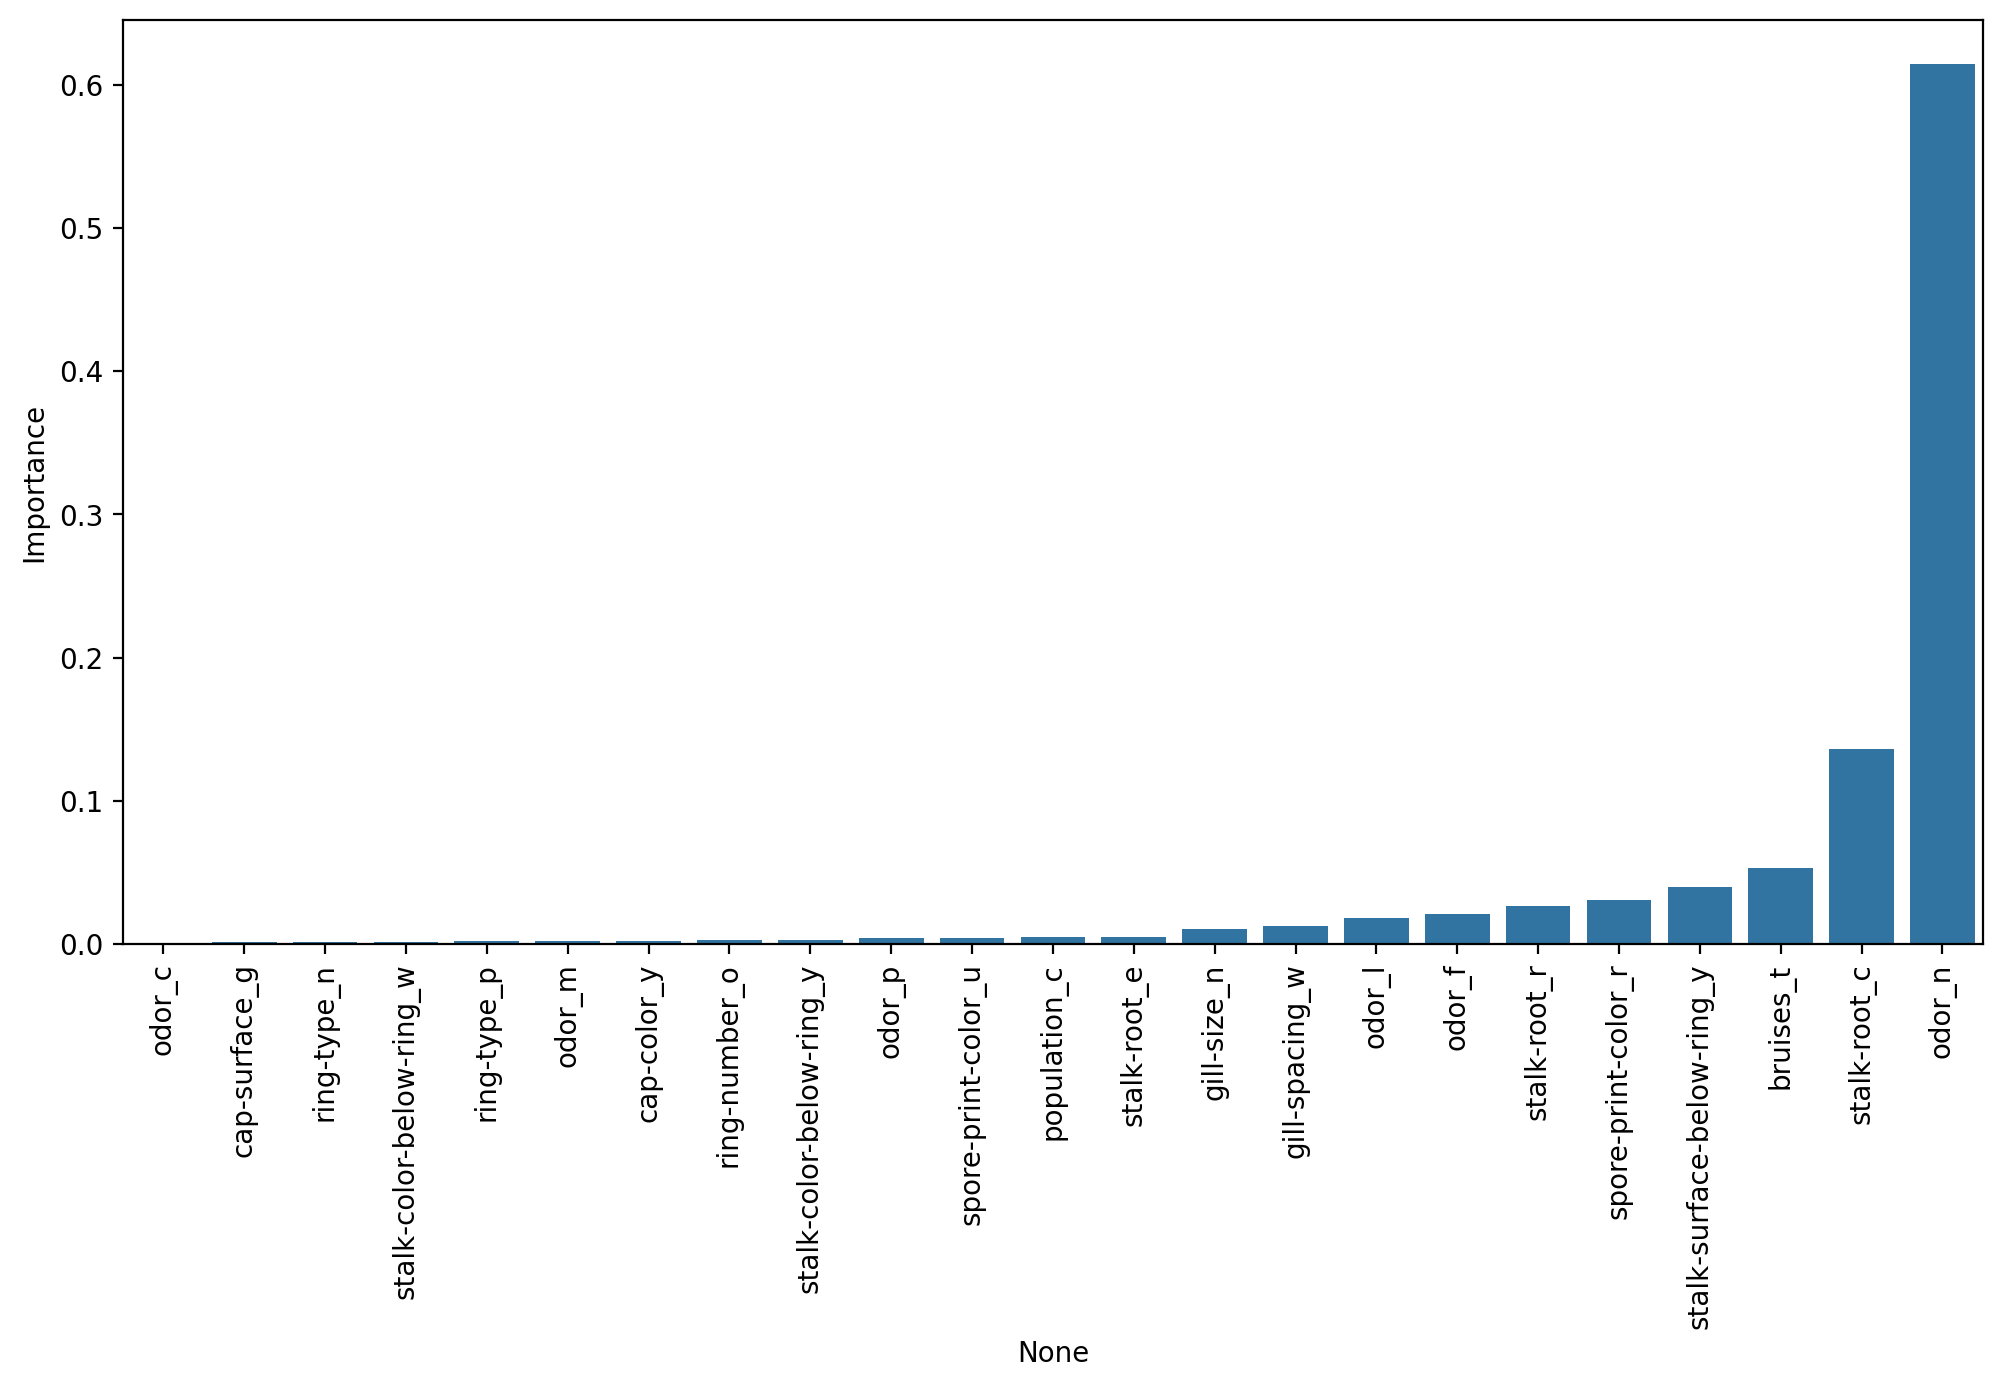

In [30]:
plt.figure(figsize=(12, 6), dpi=200)
sns.barplot(data=imp_feature, x=imp_feature.index, y='Importance')
plt.xticks(rotation=90);